In [3]:
from eval.eval_class import EvalDict
from dict.doubly_linked_dict import DoublyLinked
from dict.binary_tree_dict import BinaryTree

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

# Eval

In [5]:
sample_size = 10000

dict_py = EvalDict(dict(), size=50, n=sample_size)
dict_doubly_linked = EvalDict(DoublyLinked(), size=50, n=sample_size)
dict_binary = EvalDict(BinaryTree(), size=50, n=sample_size)

In [6]:
eval_py = dict_py.evaluation()
eval_binary = dict_binary.evaluation()
eval_doubly_linked = dict_doubly_linked.evaluation()

# Analysis

In [7]:
def calcular_media(lista):
    return sum(lista) / len(lista) if lista else 0

group_size = 10

def adjusting_samples(dict_tempos):
    medias_agrupadas = {}
    for key, value in dict_tempos.items():
        medias_agrupadas[key] = []
        for i in range(0, len(value), group_size):
            grupo = value[i:i + group_size]
            media_grupo = calcular_media(grupo)
            medias_agrupadas[key].append(media_grupo)

    return medias_agrupadas

In [8]:
# Agrupando os tempos em amostras de 10. Assim, 
# será calculado a média populacional

eval_py = adjusting_samples(eval_py)
eval_binary = adjusting_samples(eval_binary)
eval_doubly_linked = adjusting_samples(eval_doubly_linked)

## DataFrame - Time per operation

In [9]:
def calculate_stats(values):
    mean = np.mean(values) * (10**6)
    std_dev = np.std(values) * (10**6)
    return f"{mean:.3f} ± {std_dev:.3f}"

In [10]:
dataframes = []
structures = {'dict_native': eval_py, 
              'binary_tree': eval_binary, 
              'doubly_linked_list': eval_doubly_linked}

mean_per_operation = []

for name, data in structures.items():
    stats = {key: calculate_stats(value) for key, value in data.items()}
    df = pd.DataFrame(stats, index=[name])
    mean_per_operation.append(df)

mean_per_operation = pd.concat(mean_per_operation)

In [11]:
mean_per_operation

,insertion,replacing,removing_top,removing_bottom
dict_native,3.353 ± 0.807,3.780 ± 0.399,3.762 ± 0.423,3.653 ± 0.592
binary_tree,25.483 ± 2.160,3.764 ± 0.346,3.488 ± 0.103,3.432 ± 0.109
doubly_linked_list,38.439 ± 0.455,3.577 ± 0.224,3.448 ± 0.305,3.792 ± 0.422


In [12]:
mean_per_operation.to_csv("time_per_operation.csv")

## Eval - Big O notation

## 

In [13]:
structures = {
    "dict_native": dict(),
    "binary_tree": BinaryTree(),
    "doubly_linked_list": DoublyLinked()
}

results = {}
sizes = [10, 20, 30, 40, 50, 60,70, 80, 90, 100]


repetitions = 100

for name, struct in structures.items():
    evaluator = EvalDict(struct, n=repetitions)
    results[name] = evaluator.evaluation_with_size_variation(sizes)

dataframes = []

for struct_name, size_results in results.items():
    for size, mean_times in size_results.items():
        dataframes.append({
            "structure": struct_name,
            "size": size,
            **mean_times
        })

df = pd.DataFrame(dataframes)

In [14]:
df.head(7)

,structure,size,insertion,replacing,removing_top,removing_bottom
0,dict_native,10,0.99177,1.25047,1.31129,1.25579
1,dict_native,20,1.94866,2.26100,2.62435,2.51180
2,dict_native,30,2.92832,2.58344,2.19008,2.22470
3,dict_native,40,2.69182,3.21632,2.86493,2.89581
4,dict_native,50,3.18899,3.70763,3.82821,3.43042
5,dict_native,60,3.81030,4.31177,4.17836,4.14381
6,dict_native,70,4.49400,5.10862,4.95875,4.83589


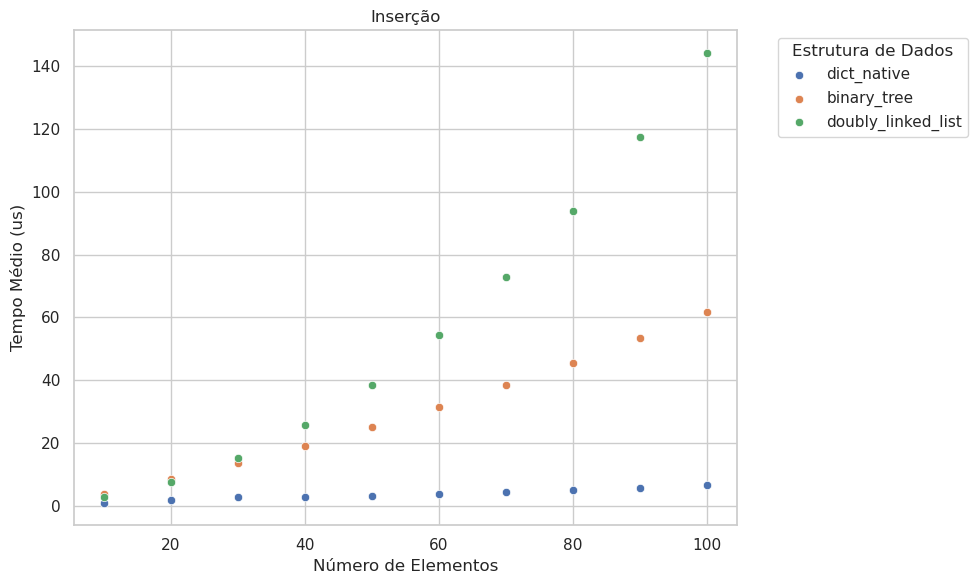

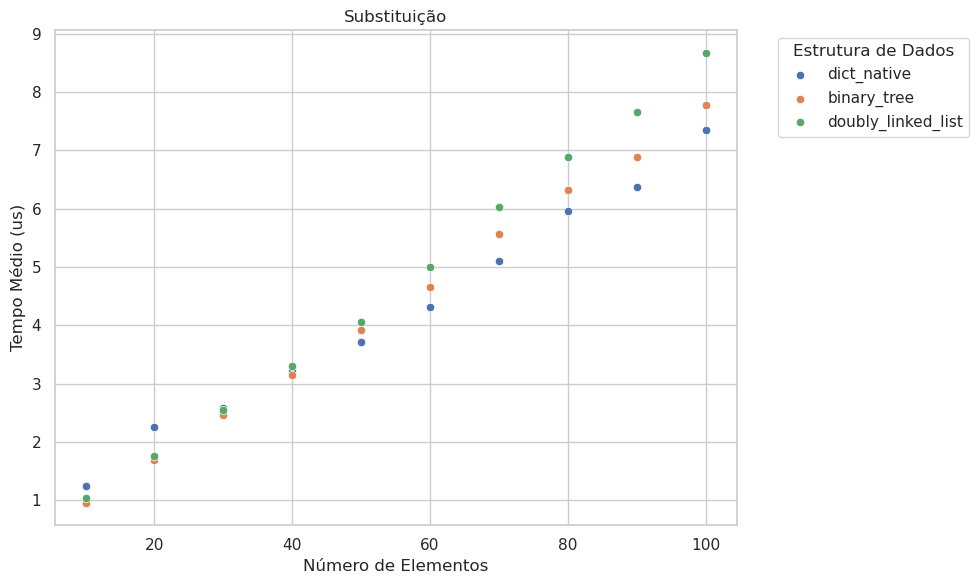

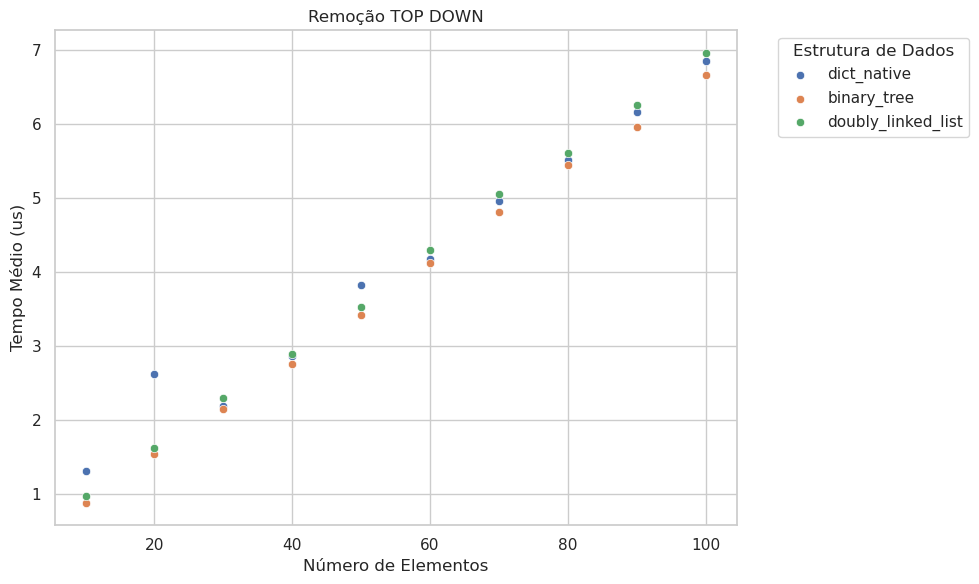

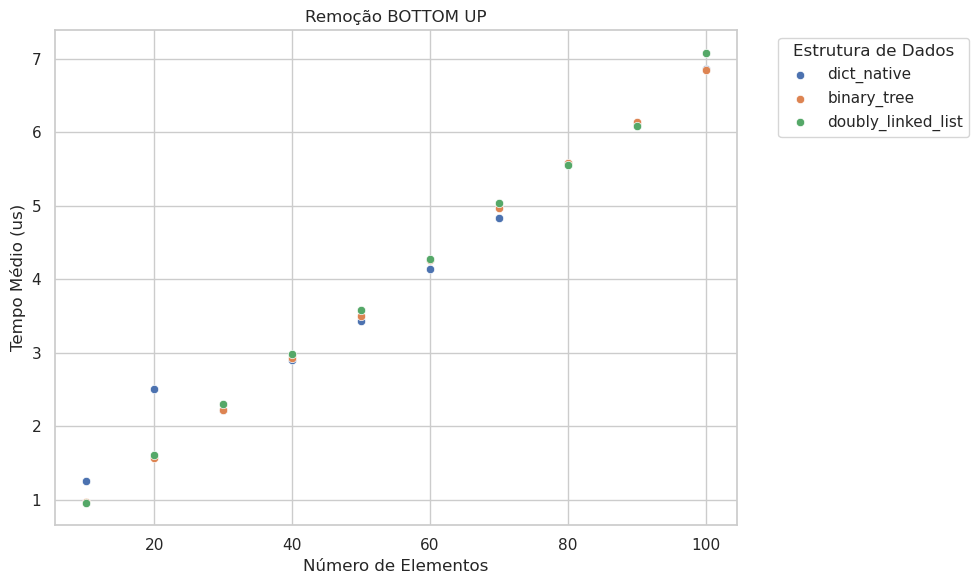

In [15]:
sns.set(style="whitegrid")

operations = ["insertion", "replacing", "removing_top", "removing_bottom"]
titles = ["Inserção", "Substituição", "Remoção TOP DOWN", "Remoção BOTTOM UP"]

for i, operation in enumerate(operations):
    plt.figure(figsize=(10, 6))
    for struct_name in structures.keys():
        sns.scatterplot(data=df[df["structure"] == struct_name], x="size", y=operation, label=struct_name, markers=True)
    plt.title(titles[i])
    plt.xlabel("Número de Elementos")
    plt.ylabel("Tempo Médio (us)")
    plt.legend(title="Estrutura de Dados", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
